# Import Libraries

In [52]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [53]:
df = pd.read_csv(os.path.join("C:\\Users", "Siddharth", "Desktop", "Datacamp Project", "EDA small project", "une_rt_m.tsv"),delimiter='\t')
df.head()
#print(os.path.join("C:\\Users", "Siddharth", "Desktop", "Datacamp Project", "EDA small project", "une_rt_m.tsv"))

,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,...,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,...,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,...,:,:,:,:,:,:,:,:,:,:


In [54]:
# Splitting the 1st column

all_rows = []
for item in df.iloc[:,0:1].values:
    current_row = str(item[0]).split(",")
    all_rows.append(current_row)
    
df1 = pd.DataFrame(data=all_rows, columns = ['s_adj','age','unit','sex','geo_time'])

df1.head()

,s_adj,age,unit,sex,geo_time
0,NSA,TOTAL,PC_ACT,F,AT
1,NSA,TOTAL,PC_ACT,F,BE
2,NSA,TOTAL,PC_ACT,F,BG
3,NSA,TOTAL,PC_ACT,F,CH
4,NSA,TOTAL,PC_ACT,F,CY


In [55]:
# Merging with original Dataframe

data_df = pd.concat([df1,df.iloc[:,1:]],axis=1)
data_df.head()

,s_adj,age,unit,sex,geo_time,2020M07,2020M06,2020M05,2020M04,2020M03,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,NSA,TOTAL,PC_ACT,F,AT,6.0,6.2,5.2,4.9,4.7,...,:,:,:,:,:,:,:,:,:,:
1,NSA,TOTAL,PC_ACT,F,BE,5.4,5.0,5.0,5.2,5.0,...,:,:,:,:,:,:,:,:,:,:
2,NSA,TOTAL,PC_ACT,F,BG,3.9,3.9,4.2,4.7,4.1,...,:,:,:,:,:,:,:,:,:,:
3,NSA,TOTAL,PC_ACT,F,CH,:,4.4,4.3,4.4,4.6,...,:,:,:,:,:,:,:,:,:,:
4,NSA,TOTAL,PC_ACT,F,CY,7.2,6.6,6.4,6.8,7.1,...,:,:,:,:,:,:,:,:,:,:


In [122]:
# Let us consider 10 years data. So we will select columns till 2010M01

data_df = data_df.loc[:,'s_adj':'2010M01 ']
data_df.head()


,s_adj,age,unit,sex,Country_code,2020M07,2020M06,2020M05,2020M04,2020M03,...,2010M10,2010M09,2010M08,2010M07,2010M06,2010M05,2010M04,2010M03,2010M02,2010M01
0,NSA,TOTAL,PC_ACT,F,AT,6.0,6.2,5.2,4.9,4.7,...,5.1,4.7,4.6,4.7,4.5,4.5,5.0,4.5,4.9,4.5
1,NSA,TOTAL,PC_ACT,F,BE,5.4,5.0,5.0,5.2,5.0,...,8.4,8.8,9.2,9.0,8.1,8.0,8.3,8.7,9.0,9.1
2,NSA,TOTAL,PC_ACT,F,BG,3.9,3.9,4.2,4.7,4.1,...,9.9,9.2,8.9,8.9,9.1,9.5,9.8,9.6,9.6,9.3
3,NSA,TOTAL,PC_ACT,F,CH,:,4.4,4.3,4.4,4.6,...,4.8,5.5,5.8,5.6,5.1,5.0,5.2,5.4,5.4,5.5
4,NSA,TOTAL,PC_ACT,F,CY,7.2,6.6,6.4,6.8,7.1,...,4.9,5.0,5.9,6.6,7.1,6.5,6.7,7.6,7.3,7.2


In [57]:
data_df = data_df.rename(columns={'geo_time': "Country_code"})
data_df.head()

,s_adj,age,unit,sex,Country_code,2020M07,2020M06,2020M05,2020M04,2020M03,...,2010M10,2010M09,2010M08,2010M07,2010M06,2010M05,2010M04,2010M03,2010M02,2010M01
0,NSA,TOTAL,PC_ACT,F,AT,6.0,6.2,5.2,4.9,4.7,...,5.1,4.7,4.6,4.7,4.5,4.5,5.0,4.5,4.9,4.5
1,NSA,TOTAL,PC_ACT,F,BE,5.4,5.0,5.0,5.2,5.0,...,8.4,8.8,9.2,9.0,8.1,8.0,8.3,8.7,9.0,9.1
2,NSA,TOTAL,PC_ACT,F,BG,3.9,3.9,4.2,4.7,4.1,...,9.9,9.2,8.9,8.9,9.1,9.5,9.8,9.6,9.6,9.3
3,NSA,TOTAL,PC_ACT,F,CH,:,4.4,4.3,4.4,4.6,...,4.8,5.5,5.8,5.6,5.1,5.0,5.2,5.4,5.4,5.5
4,NSA,TOTAL,PC_ACT,F,CY,7.2,6.6,6.4,6.8,7.1,...,4.9,5.0,5.9,6.6,7.1,6.5,6.7,7.6,7.3,7.2


In [58]:
# Import Country Codes Dataset

In [59]:
countries = pd.read_csv(os.path.join("C:\\Users", "Siddharth", "Desktop", "Datacamp Project", "EDA small project", "countries_list.csv"))
countries.head()

,Country,Country_code
0,Åland Islands,AX
1,Afghanistan,AF
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [60]:
# Merge original dataframe with country codes dataframe

data_df_merged = data_df.merge(countries, on="Country_code")
data_df_merged.head()

,s_adj,age,unit,sex,Country_code,2020M07,2020M06,2020M05,2020M04,2020M03,...,2010M09,2010M08,2010M07,2010M06,2010M05,2010M04,2010M03,2010M02,2010M01,Country
0,NSA,TOTAL,PC_ACT,F,AT,6.0,6.2,5.2,4.9,4.7,...,4.7,4.6,4.7,4.5,4.5,5.0,4.5,4.9,4.5,Austria
1,NSA,TOTAL,PC_ACT,M,AT,5.5,6.2,6.1,5.2,5.0,...,4.8,4.7,5.0,5.0,4.9,5.5,6.2,6.0,5.2,Austria
2,NSA,TOTAL,PC_ACT,T,AT,5.7,6.2,5.7,5.1,4.9,...,4.8,4.7,4.8,4.7,4.8,5.2,5.4,5.5,4.9,Austria
3,NSA,TOTAL,THS_PER,F,AT,129,132,108,100,97,...,93,91,92,76,93,104,76,100,93,Austria
4,NSA,TOTAL,THS_PER,M,AT,134,149,144,121,118,...,111,109,113,95,118,133,120,142,122,Austria


# Frequency Distribution

In [61]:
import seaborn as sns

In [62]:
data_df_merged = pd.read_csv(os.path.join("C:\\Users", "Siddharth", "Desktop", "Datacamp Project", "EDA small project", "Unemployment_Data.csv"))
data_df_merged.head()

,s_adj,age,unit,sex,Country_code,2020M06,2020M05,2020M04,2020M03,2020M02,...,2010M09,2010M08,2010M07,2010M06,2010M05,2010M04,2010M03,2010M02,2010M01,Country
0,NSA,TOTAL,PC_ACT,F,AT,6.3,5.6,5.2,4.7,4.1,...,4.7,4.6,4.7,4.5,4.5,5.0,4.5,4.9,4.5,Austria
1,NSA,TOTAL,PC_ACT,M,AT,6.1,6.3,5.2,5.0,5.5,...,4.8,4.7,5.0,5.0,4.9,5.5,6.2,6.0,5.2,Austria
2,NSA,TOTAL,PC_ACT,T,AT,6.2,6.0,5.2,4.9,4.9,...,4.8,4.7,4.8,4.7,4.8,5.2,5.4,5.5,4.9,Austria
3,NSA,TOTAL,THS_PER,F,AT,136,116,107,97,88,...,93,91,92,76,93,104,76,100,93,Austria
4,NSA,TOTAL,THS_PER,M,AT,146,149,121,118,133,...,111,109,113,95,118,133,120,142,122,Austria


### For month-wise visualization, we first need to convert the dataframe to a pivot dataset for time-series data

In [63]:
data_tr_df = data_df_merged.melt(id_vars=["Country", "age", "unit", "sex", "s_adj", "Country_code"], 
        var_name="Date", 
        value_name="Value")

data_tr_df.head()

,Country,age,unit,sex,s_adj,Country_code,Date,Value
0,Austria,TOTAL,PC_ACT,F,NSA,AT,2020M06,6.3
1,Austria,TOTAL,PC_ACT,M,NSA,AT,2020M06,6.1
2,Austria,TOTAL,PC_ACT,T,NSA,AT,2020M06,6.2
3,Austria,TOTAL,THS_PER,F,NSA,AT,2020M06,136
4,Austria,TOTAL,THS_PER,M,NSA,AT,2020M06,146


In [64]:
data_tr_df.shape

(220878, 8)

### We can now visualize the last 10 years unemployment rate Country-wise, Age-wise and Gender-wise

In [65]:
# First let us clean the data. We remove values which have spaces and non-digit values

In [66]:
import re

for i in range(len(data_tr_df['Value'].values)):
    data_tr_df['Value'].values[i] = re.sub(r"[a-zA-Z: ]", "", data_tr_df['Value'].values[i])
    data_tr_df['Value'].values[i] = data_tr_df['Value'].values[i].replace(" ","")
    

In [67]:
# Country-wise
# Let us visualize for one country first. Let's say Austria

country_data = data_tr_df[(data_tr_df['Country']=='Austria') & (data_tr_df['age']=='Y25-74') & (data_tr_df['sex']=='T') & (data_tr_df['s_adj']=='TC') & (data_tr_df['unit']=='PC_ACT')]
country_data = country_data.loc[:,['Date','Value']]
print(country_data.shape)
country_data.head()

(126, 2)


,Date,Value
44,2020M06,5.1
1797,2020M05,5.2
3550,2020M04,4.2
5303,2020M03,3.9
7056,2020M02,3.7


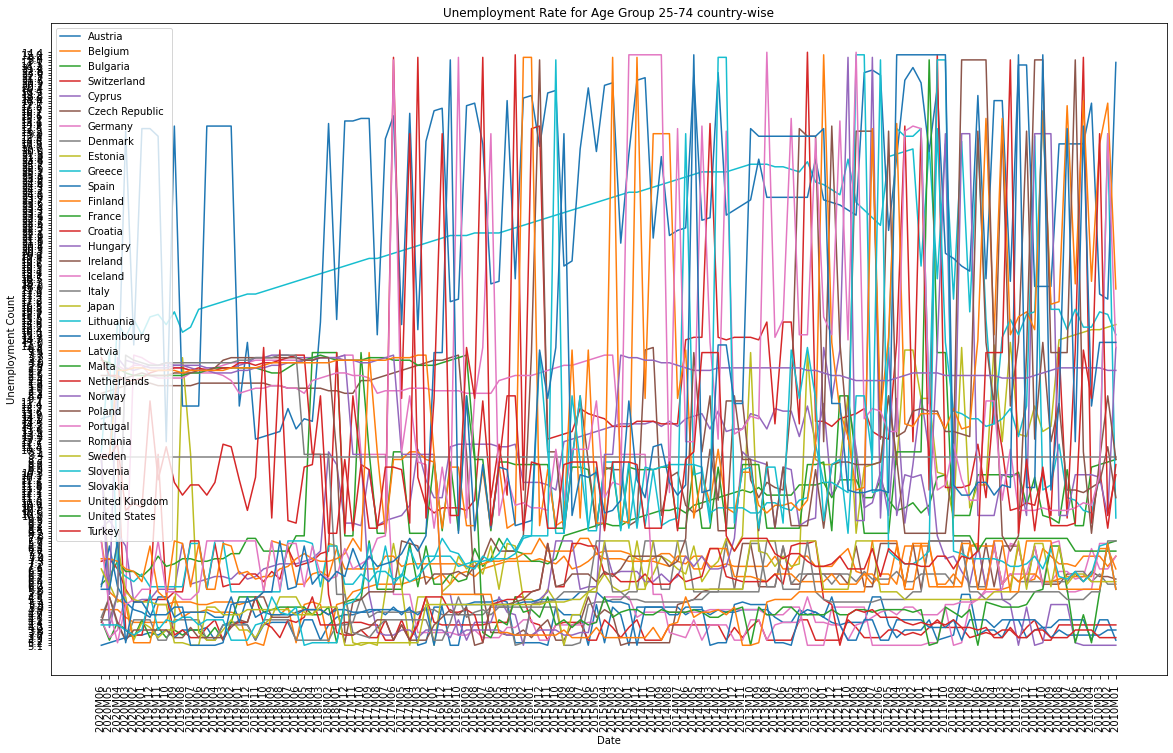

In [68]:
plt.figure(figsize=(20, 12))
countries = data_tr_df['Country'].unique()
for country in countries:
    country_data = data_tr_df[(data_tr_df['Country']==country) & (data_tr_df['age']=='Y25-74') & (data_tr_df['sex']=='T') & (data_tr_df['s_adj']=='TC') & (data_tr_df['unit']=='PC_ACT')]
    country_data = country_data.loc[:,['Date','Value']]
    plt.plot(country_data['Date'].values, country_data['Value'].values, label=country)

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate for Age Group 25-74 country-wise')
plt.legend()
plt.show()

In [69]:
# It is difficult to get proper insights

In [70]:
# Let's split the Date column into Year and Month and then we'll group by Year to get aggregated Unemployment Count

In [71]:
data_tr_df[['Year','Month']] = data_tr_df['Date'].str.split("M",expand=True)
data_tr_df.head()

,Country,age,unit,sex,s_adj,Country_code,Date,Value,Year,Month
0,Austria,TOTAL,PC_ACT,F,NSA,AT,2020M06,6.3,2020,06
1,Austria,TOTAL,PC_ACT,M,NSA,AT,2020M06,6.1,2020,06
2,Austria,TOTAL,PC_ACT,T,NSA,AT,2020M06,6.2,2020,06
3,Austria,TOTAL,THS_PER,F,NSA,AT,2020M06,136,2020,06
4,Austria,TOTAL,THS_PER,M,NSA,AT,2020M06,146,2020,06


In [72]:
data_tr_df.dtypes

Country         object
age             object
unit            object
sex             object
s_adj           object
Country_code    object
Date            object
Value           object
Year            object
Month           object
dtype: object

In [73]:
# Converting Value to Float Data Type
data_tr_df['Value'] = pd.to_numeric(data_tr_df['Value'])

In [74]:
data_tr_df.head()

,Country,age,unit,sex,s_adj,Country_code,Date,Value,Year,Month
0,Austria,TOTAL,PC_ACT,F,NSA,AT,2020M06,6.3,2020,06
1,Austria,TOTAL,PC_ACT,M,NSA,AT,2020M06,6.1,2020,06
2,Austria,TOTAL,PC_ACT,T,NSA,AT,2020M06,6.2,2020,06
3,Austria,TOTAL,THS_PER,F,NSA,AT,2020M06,136.0,2020,06
4,Austria,TOTAL,THS_PER,M,NSA,AT,2020M06,146.0,2020,06


In [75]:
# Group by Year - to get overall unemployment count for all the countries

In [76]:
data_tr_df_year = data_tr_df.groupby('Year').sum()

In [77]:
data_tr_df_year.head()

,Value
Year,
2010,5259589.1
2011,5123700.7
2012,5270180.4
2013,5309438.8
2014,4908945.6


No handles with labels found to put in legend.


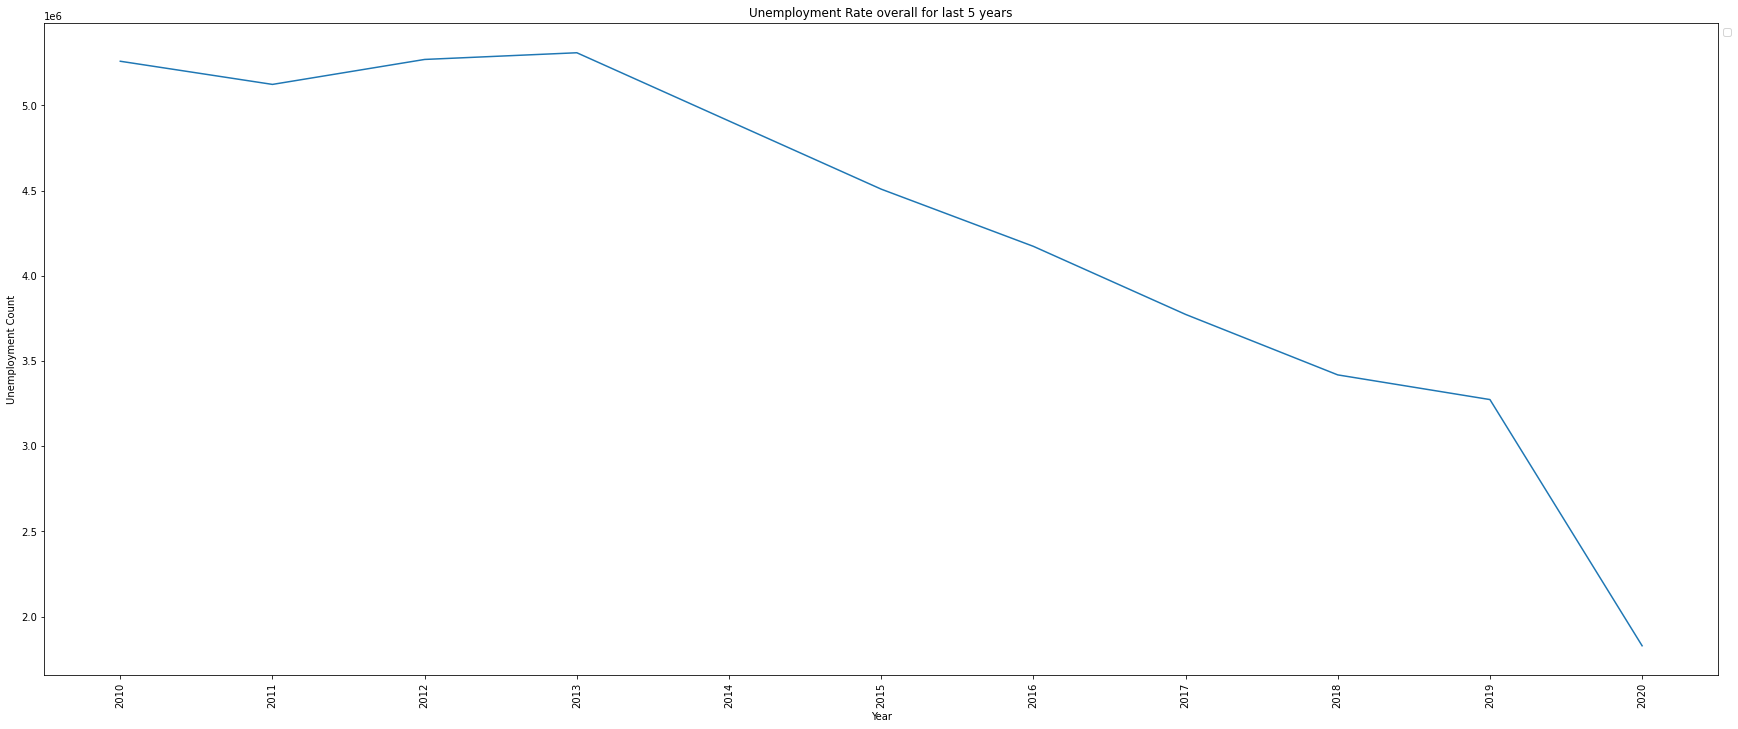

In [78]:
plt.figure(figsize=(30, 12))

plt.plot(data_tr_df_year.index, data_tr_df_year.values)

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate overall for last 5 years')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

In [79]:
# Group by Year and Country - to get overall unemployment count for country-wise

In [80]:
data_tr_df_country = data_tr_df.groupby(['Country','Year']).sum().reset_index()

In [81]:
data_tr_df_country.head()

,Country,Year,Value
0,Austria,2010,31283.3
1,Austria,2011,29814.4
2,Austria,2012,32256.0
3,Austria,2013,35399.6
4,Austria,2014,37354.1


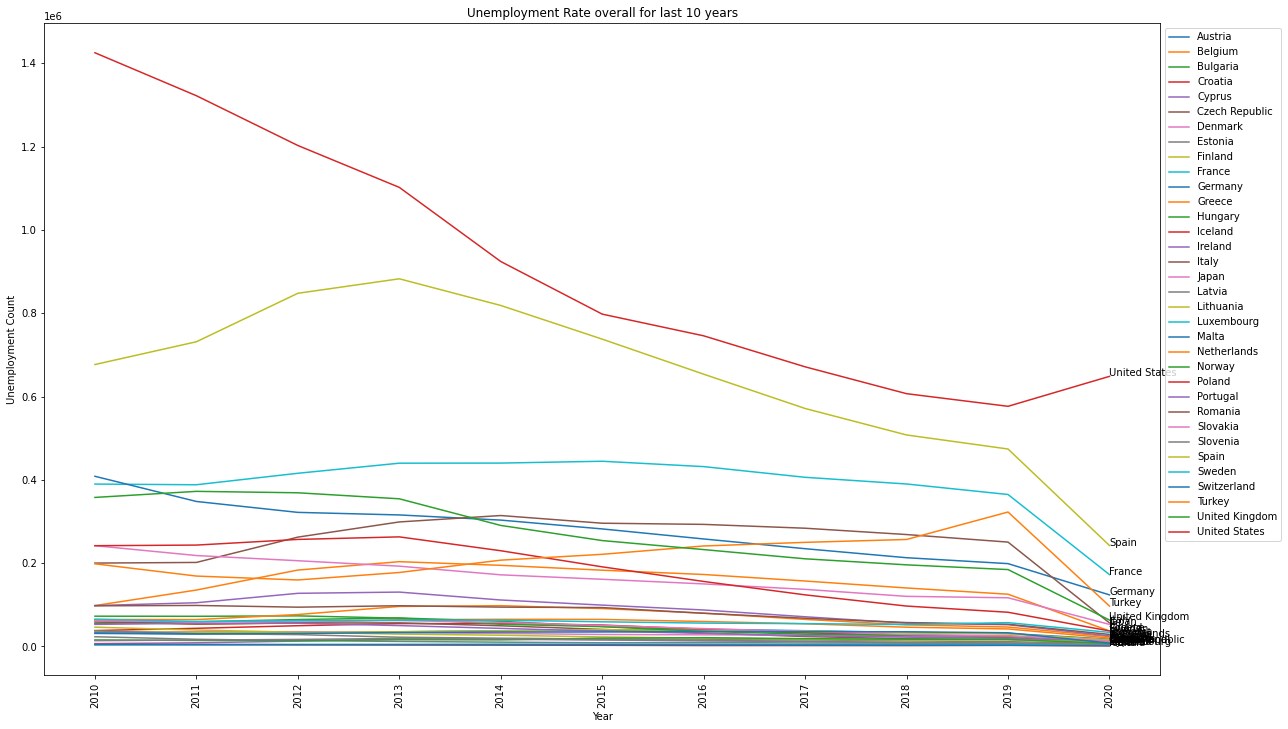

In [82]:
f, ax = plt.subplots(1,1, figsize=(20,12))

countries = data_tr_df_country['Country'].unique()

for country in countries:
    df_ = data_tr_df_country[data_tr_df_country['Country']==country]
    plt.plot(df_['Year'], df_['Value'], label=country)
    ax.text(max(df_['Year']), (df_.loc[df_['Year']==max(df_['Year']), 'Value']), str(country))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate overall for last 10 years')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

United States have shown some rise in Unemployment Count in this year

In [83]:
# Group by Year and Gender

In [84]:
data_tr_df_sex = data_tr_df.groupby(['sex','Year']).sum().reset_index()

In [85]:
data_tr_df_sex.head()

,sex,Year,Value
0,F,2010,1125204.5
1,F,2011,1133657.3
2,F,2012,1182239.6
3,F,2013,1185574.0
4,F,2014,1100000.6


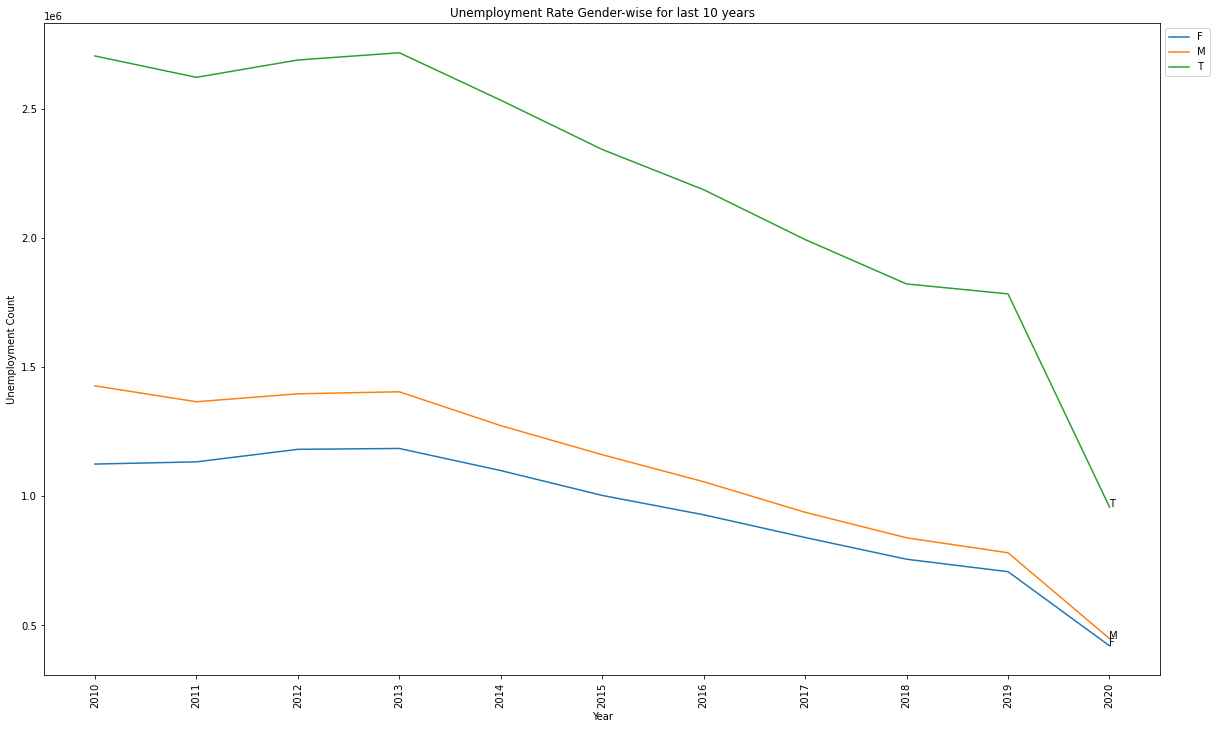

In [86]:
f, ax = plt.subplots(1,1, figsize=(20,12))

genders = data_tr_df_sex['sex'].unique()

for gender in genders:
    df_ = data_tr_df_sex[data_tr_df_sex['sex']==gender]
    plt.plot(df_['Year'], df_['Value'], label=gender)
    ax.text(max(df_['Year']), (df_.loc[df_['Year']==max(df_['Year']), 'Value']), str(gender))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Gender-wise for last 10 years')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

In [87]:
# Group by Age and Year

In [88]:
data_tr_df_age = data_tr_df.groupby(['age','Year']).sum().reset_index()
data_tr_df_age.head()

,age,Year,Value
0,TOTAL,2010,2634500.2
1,TOTAL,2011,2561897.2
2,TOTAL,2012,2630738.7
3,TOTAL,2013,2647533.9
4,TOTAL,2014,2446493.2


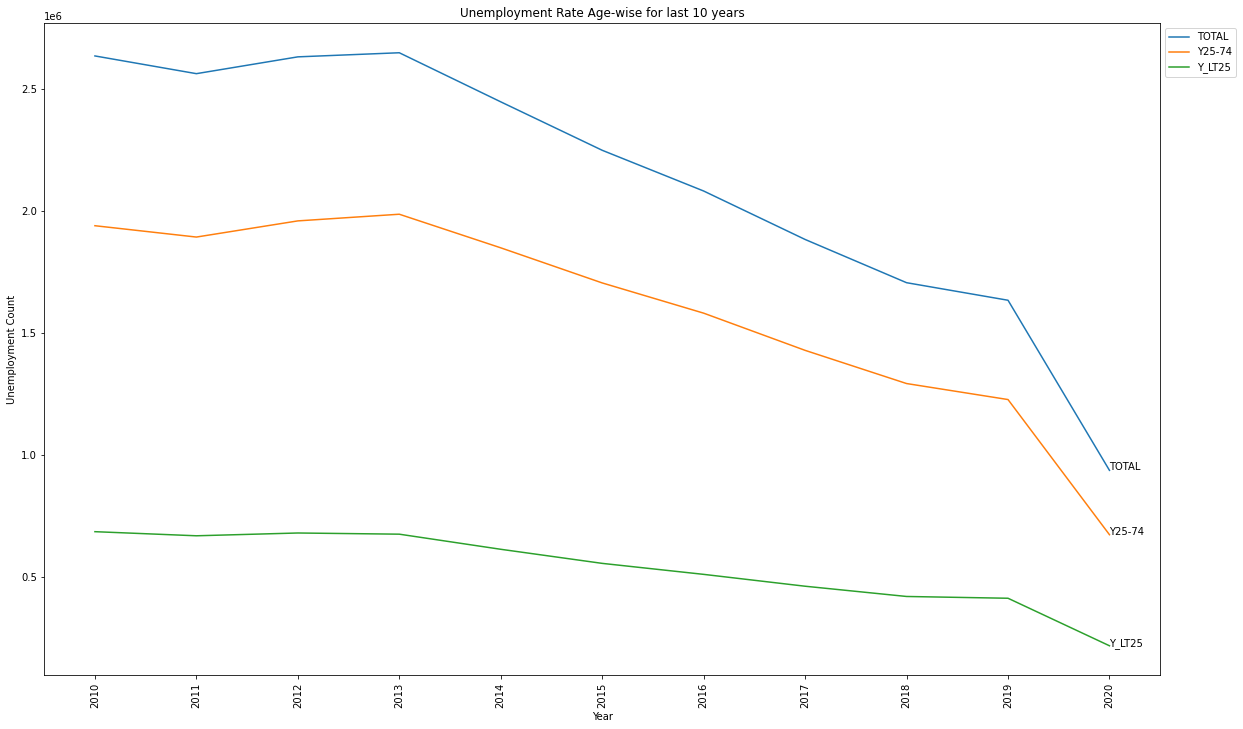

In [89]:
f, ax = plt.subplots(1,1, figsize=(20,12))

ages = data_tr_df_age['age'].unique()

for age in ages:
    df_ = data_tr_df_age[data_tr_df_age['age']==age]
    plt.plot(df_['Year'], df_['Value'], label=age)
    ax.text(max(df_['Year']), (df_.loc[df_['Year']==max(df_['Year']), 'Value']), str(age))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Age-wise for last 10 years')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

In [90]:
# Group by Year, Month and Country

In [91]:
data_tr_df_year_month_country = data_tr_df.groupby(['Country','Year','Month']).sum().reset_index()
data_tr_df_year_month_country.head()

,Country,Year,Month,Value
0,Austria,2010,01,2775.8
1,Austria,2010,02,2847.2
2,Austria,2010,03,2632.2
3,Austria,2010,04,2826.6
4,Austria,2010,05,2695.9


In [92]:
# Now let's plot for 2019 and 2020 only

data_tr_df_year_month_country_last_two_years = data_tr_df_year_month_country[(data_tr_df_year_month_country['Year']=='2019') | (data_tr_df_year_month_country['Year']=='2020')]

data_tr_df_year_month_country_last_two_years.head()

,Country,Year,Month,Value
108,Austria,2019,01,2760.5
109,Austria,2019,02,2818.8
110,Austria,2019,03,2753.8
111,Austria,2019,04,2692.3
112,Austria,2019,05,2597.4


In [93]:
data_tr_df_year_month_country_last_two_years['Year_Month'] = data_tr_df_year_month_country_last_two_years['Year'] + 'M' + data_tr_df_year_month_country_last_two_years['Month']
data_tr_df_year_month_country_last_two_years.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Country,Year,Month,Value,Year_Month
108,Austria,2019,01,2760.5,2019M01
109,Austria,2019,02,2818.8,2019M02
110,Austria,2019,03,2753.8,2019M03
111,Austria,2019,04,2692.3,2019M04
112,Austria,2019,05,2597.4,2019M05


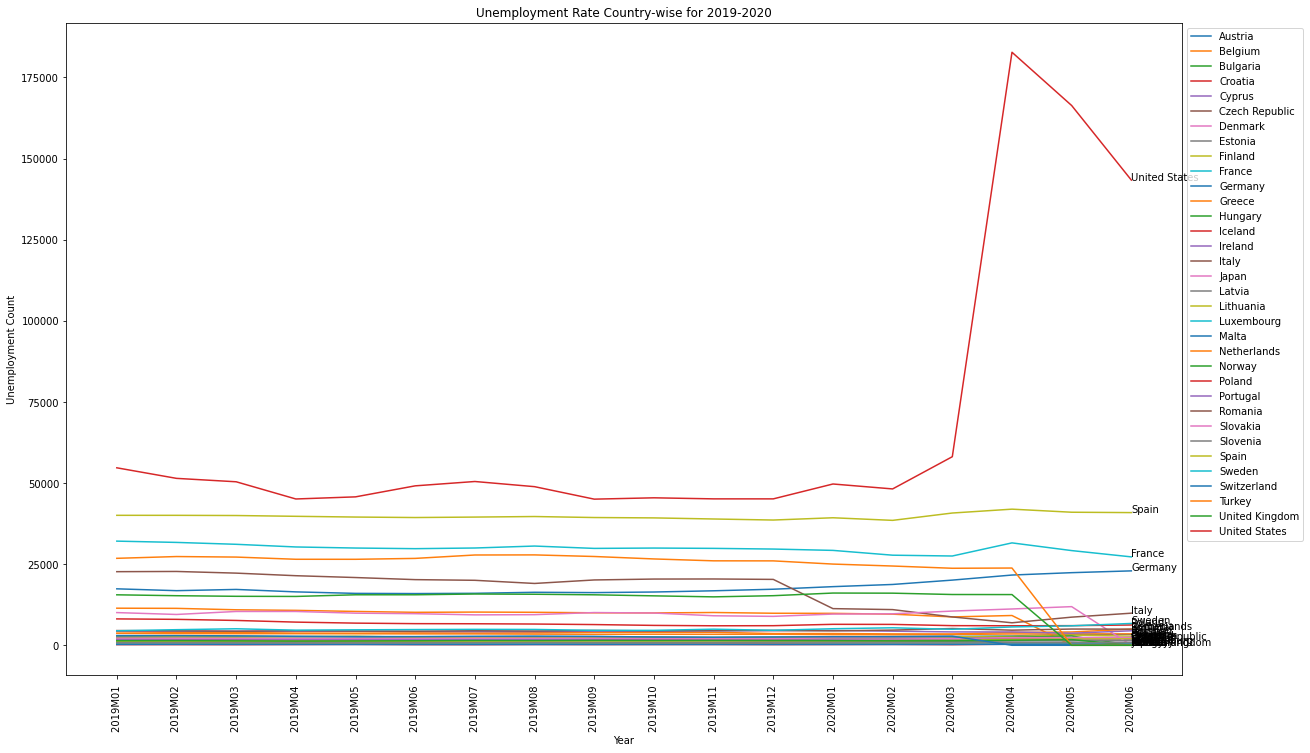

In [94]:
f, ax = plt.subplots(1,1, figsize=(20,12))

countries = data_tr_df_year_month_country_last_two_years['Country'].unique()

for country in countries:
    df_ = data_tr_df_year_month_country_last_two_years[data_tr_df_year_month_country_last_two_years['Country']==country]
    
    plt.plot(df_['Year_Month'], df_['Value'], label=country)
    ax.text(max(df_['Year_Month']), (df_.loc[df_['Year_Month']==max(df_['Year_Month']), 'Value']), str(country))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Country-wise for 2019-2020')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

United States did massive lay-offs in April 2020

In [95]:
# Group by Country, Age, Year and Month
data_tr_df_year_month_country_age = data_tr_df.groupby(['Country','Year','Month','age']).sum().reset_index()

In [96]:
data_tr_df_year_month_country_age

,Country,Year,Month,age,Value
0,Austria,2010,01,TOTAL,1346.6
1,Austria,2010,01,Y25-74,969.0
2,Austria,2010,01,Y_LT25,460.2
3,Austria,2010,02,TOTAL,1381.8
4,Austria,2010,02,Y25-74,1001.1
...,...,...,...,...,...
12847,United States,2020,05,Y25-74,63570.9
12848,United States,2020,05,Y_LT25,19667.5
12849,United States,2020,06,TOTAL,71619.1
12850,United States,2020,06,Y25-74,54552.4


In [97]:
# Let us focus on United States for now

data_tr_df_year_month_country_age = data_tr_df_year_month_country_age[(data_tr_df_year_month_country_age['Country']=='United States') & ((data_tr_df_year_month_country_age['Year']=='2020') | (data_tr_df_year_month_country_age['Year']=='2019'))]
data_tr_df_year_month_country_age

,Country,Year,Month,age,Value
12798,United States,2019,01,TOTAL,27319.2
12799,United States,2019,01,Y25-74,19476.5
12800,United States,2019,01,Y_LT25,7895.0
12801,United States,2019,02,TOTAL,25693.7
12802,United States,2019,02,Y25-74,18199.2
12803,United States,2019,02,Y_LT25,7544.4
12804,United States,2019,03,TOTAL,25169.1
12805,United States,2019,03,Y25-74,17991.0
12806,United States,2019,03,Y_LT25,7225.6
12807,United States,2019,04,TOTAL,22520.8


In [98]:
data_tr_df_year_month_country_age['Year_Month'] = data_tr_df_year_month_country_age['Year'] + 'M' + data_tr_df_year_month_country_age['Month']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [99]:
data_tr_df_year_month_country_age = data_tr_df_year_month_country_age.loc[:,['Year_Month','age','Value']]

In [100]:
data_tr_df_year_month_country_age

,Year_Month,age,Value
12798,2019M01,TOTAL,27319.2
12799,2019M01,Y25-74,19476.5
12800,2019M01,Y_LT25,7895.0
12801,2019M02,TOTAL,25693.7
12802,2019M02,Y25-74,18199.2
12803,2019M02,Y_LT25,7544.4
12804,2019M03,TOTAL,25169.1
12805,2019M03,Y25-74,17991.0
12806,2019M03,Y_LT25,7225.6
12807,2019M04,TOTAL,22520.8


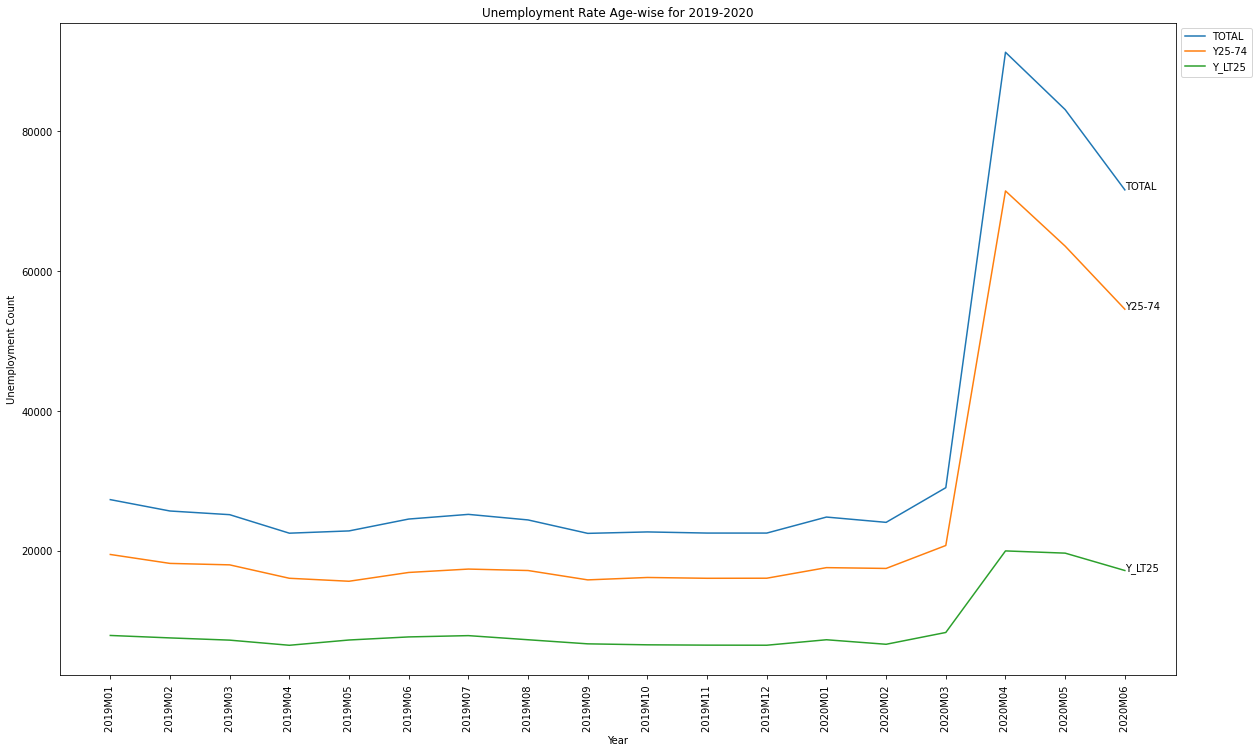

In [101]:
f, ax = plt.subplots(1,1, figsize=(20,12))

ages = data_tr_df_year_month_country_age['age'].unique()

for age in ages:
    df_ = data_tr_df_year_month_country_age[data_tr_df_year_month_country_age['age']==age]
    
    plt.plot(df_['Year_Month'], df_['Value'], label=age)
    ax.text(max(df_['Year_Month']), (df_.loc[df_['Year_Month']==max(df_['Year_Month']), 'Value']), str(age))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Age-wise for 2019-2020')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

Most affected age group is 25-74

In [102]:
data_age_gen_year_month = data_tr_df.groupby(['Country','Year','Month','age','sex']).sum().reset_index()
data_age_gen_year_month

,Country,Year,Month,age,sex,Value
0,Austria,2010,01,TOTAL,F,288.9
1,Austria,2010,01,TOTAL,M,391.8
2,Austria,2010,01,TOTAL,T,665.9
3,Austria,2010,01,Y25-74,F,203.2
4,Austria,2010,01,Y25-74,M,288.3
...,...,...,...,...,...,...
37795,United States,2020,06,Y25-74,M,13790.4
37796,United States,2020,06,Y25-74,T,27266.4
37797,United States,2020,06,Y_LT25,F,4398.2
37798,United States,2020,06,Y_LT25,M,4215.1


In [103]:
data_age_gen_year_month = data_age_gen_year_month[(data_age_gen_year_month['Country']=='United States') & ((data_age_gen_year_month['Year']=='2020') | (data_age_gen_year_month['Year']=='2019'))]
data_age_gen_year_month

,Country,Year,Month,age,sex,Value
37638,United States,2019,01,TOTAL,F,6070.0
37639,United States,2019,01,TOTAL,M,7593.8
37640,United States,2019,01,TOTAL,T,13655.4
37641,United States,2019,01,Y25-74,F,4369.6
37642,United States,2019,01,Y25-74,M,5372.1
...,...,...,...,...,...,...
37795,United States,2020,06,Y25-74,M,13790.4
37796,United States,2020,06,Y25-74,T,27266.4
37797,United States,2020,06,Y_LT25,F,4398.2
37798,United States,2020,06,Y_LT25,M,4215.1


In [104]:
data_age_gen_year_month['Year_Month']=data_age_gen_year_month['Year']+'M'+data_age_gen_year_month['Month']
data_age_gen_year_month = data_age_gen_year_month.loc[:,["Year_Month", "age", "sex", "Value"]]
print(data_age_gen_year_month)

      Year_Month     age sex    Value
37638   2019M01    TOTAL   F   6070.0
37639   2019M01    TOTAL   M   7593.8
37640   2019M01    TOTAL   T  13655.4
37641   2019M01   Y25-74   F   4369.6
37642   2019M01   Y25-74   M   5372.1
...          ...     ...  ..      ...
37795   2020M06   Y25-74   M  13790.4
37796   2020M06   Y25-74   T  27266.4
37797   2020M06   Y_LT25   F   4398.2
37798   2020M06   Y_LT25   M   4215.1
37799   2020M06   Y_LT25   T   8571.1

[162 rows x 4 columns]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


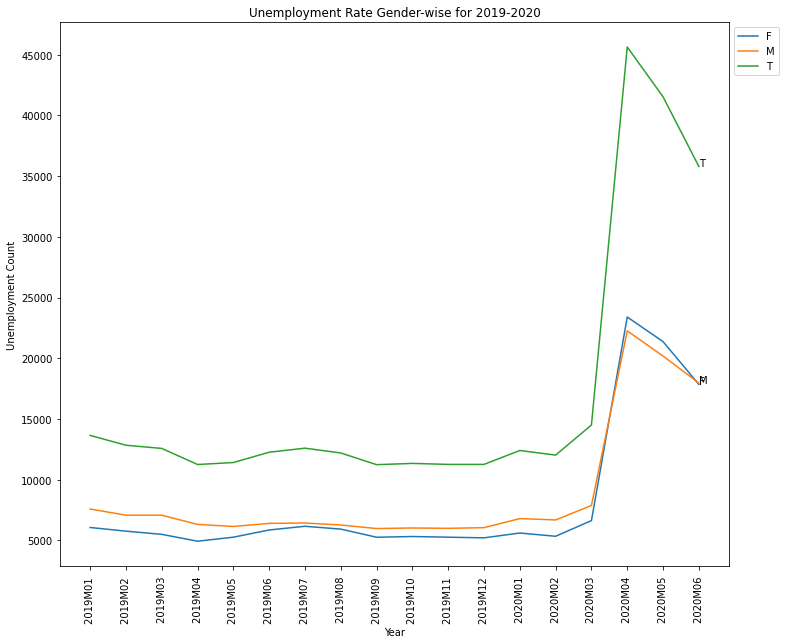

In [117]:
f, ax = plt.subplots(1,1, figsize=(12,10))

sexes = data_age_gen_year_month['sex'].unique()
df1= data_age_gen_year_month[data_age_gen_year_month['age']=='TOTAL']

for sex in sexes:
    df_ = df1[df1['sex']==sex]
    
    plt.plot(df_['Year_Month'], df_['Value'], label=sex)
    ax.text(max(df_['Year_Month']), (df_.loc[df_['Year_Month']==max(df_['Year_Month']), 'Value']), str(sex))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Gender-wise for 2019-2020')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

Unemployment count/month for men was already higher than that of women till March 2020.

March 2020- A huge jump in unemployment rate was observed. Unmployment rate increased more steeply for women than men. By the end of March, unemployment count for women was greater than men. 

April 2020- Unemployment rate decreased for both genders in the same rate till the end of the month.

May 2020- Unemployment rate decreased even more for women will it remeained same for men.

June 2020- Unemployment count/month for women became marginally greater than men

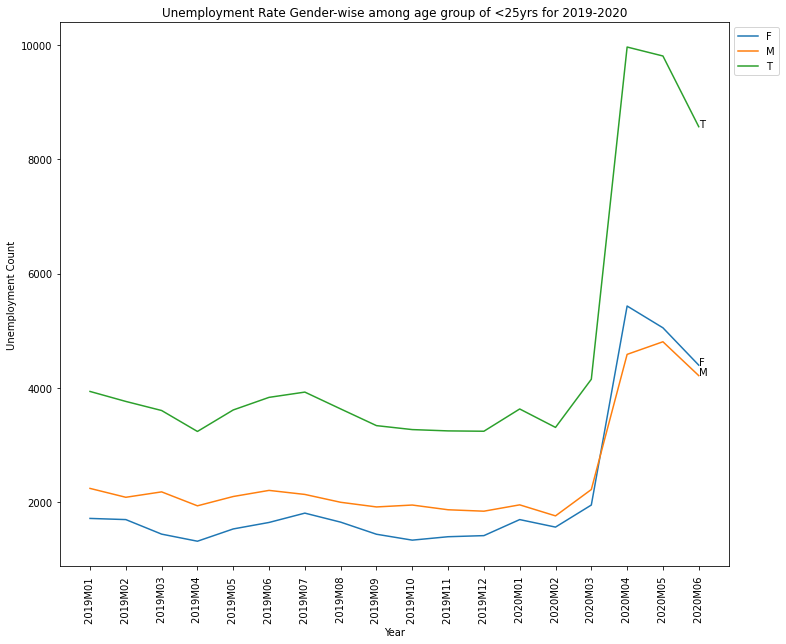

In [120]:
f, ax = plt.subplots(1,1, figsize=(12,10))

sexes = data_age_gen_year_month['sex'].unique()
df1= data_age_gen_year_month[data_age_gen_year_month['age']=='Y_LT25']

for sex in sexes:
    df_ = df1[df1['sex']==sex]
    
    plt.plot(df_['Year_Month'], df_['Value'], label=sex)
    ax.text(max(df_['Year_Month']), (df_.loc[df_['Year_Month']==max(df_['Year_Month']), 'Value']), str(sex))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Gender-wise among age group of <25yrs for 2019-2020')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

Among age group of less than 25 year olds, it has been observed that:

March 2020- rate of increase in unemployment for women was more steeper than men such that by the end of March, there were significantly more unemployed women than men

April 2020 - unemployment rate started to decrease for women while it was still increasing for men in a much slower rate till the end of month 

May 2020 - unemployment rate started to decrease for men in the same rate as that of women.

June 2020 - unemplyment count/month for women still remained greater than that of men

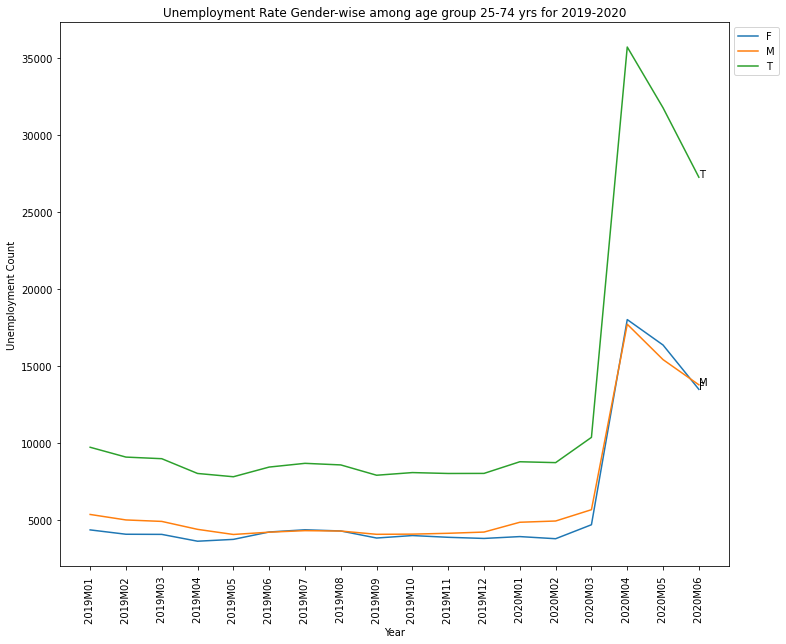

In [121]:
f, ax = plt.subplots(1,1, figsize=(12,10))

sexes = data_age_gen_year_month['sex'].unique()
df1= data_age_gen_year_month[data_age_gen_year_month['age']=='Y25-74']

for sex in sexes:
    df_ = df1[df1['sex']==sex]
    
    plt.plot(df_['Year_Month'], df_['Value'], label=sex)
    ax.text(max(df_['Year_Month']), (df_.loc[df_['Year_Month']==max(df_['Year_Month']), 'Value']), str(sex))

plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Count')
plt.title('Unemployment Rate Gender-wise among age group 25-74 yrs for 2019-2020')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.yscale("linear")
plt.show()

Among age group of 25 to 74 year olds, it has been observed that:

March 2020- rate of increase in unemployment for women was slighty steeper than men such that by the end of March, there were a bit more unemployed women than men

April 2020 - unemployment rate started to decrease for both men and women. The rate of decrease was more steeper for men than women initially. However in the mid-April rate of decrease became less steep for men while it remained same for women

May 2020 - The rate of decrease became more steeper for women and remained same for men

June 2020 - unemplyment count/month for men was slightly greater than that of men

It can be observed that by the end of March 2020 more number of women lost their jobs than men. 